# HW8 total 8 points
# Feature engineering and NA handling

Before we build any classification model, we need to understand the dataset, It'll help in relevant features creation and proper handling of missing values.

In this homework we will see how to create new features and measure association(like correlation between numerical variable) between two categorical variables. There are more columns for feature engineering but we'll focus on name column and filling missing values in other columns.

To illustrates the concept, we will use titanic dataset. This is a well explored dataset but provides a lot of opportunity for feature engineering. Task is predicting the survival of a passenger, but we will not build model in this homework.


In [1]:
"""import necessary libraries"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import re
%matplotlib inline
sns.set(style="darkgrid")
from sklearn.preprocessing import LabelEncoder

In [2]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/utsav507/titanic-data-analysis/master/titanic_train.csv')

In [3]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- As you can see a lot of people don't have a cabin(687/891). We can't drop record based on cabin. We'll encode not having a cabin as character **O**

# Q1 (.5 points) fill NAN in cabin with Character 'O'

In [6]:
#Write code here
"""fill NA in "Cabin" column with value 'O'"""
titanic_df['Cabin'].fillna(value='O', inplace=True)
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [7]:
titanic_df.Cabin.head(15)

0        O
1      C85
2        O
3     C123
4        O
5        O
6      E46
7        O
8        O
9        O
10      G6
11    C103
12       O
13       O
14       O
Name: Cabin, dtype: object

If we one hot encode above cabin values and view correlation heatmap, there will be a lot of categories. Let create a new column based on cabin class first letter(C, D ,E, O etc.) .

# Q2 (.5 points) Create a new column named Cabin_type.  Use first character from Cabin field to fill value in  Cabin_type.

In [8]:
#Write code here
"""create "Cabin_type" using df.apply"""
titanic_df['Cabin_type'] = titanic_df['Cabin'].apply(lambda x : x[0:1])

In [9]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S,O
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S,O


Let's explore survival based on sex.

# Q3(.5 point) Using seaborn plot a countplot   of Sex. Use proper hue so that it highlights Survived or not.

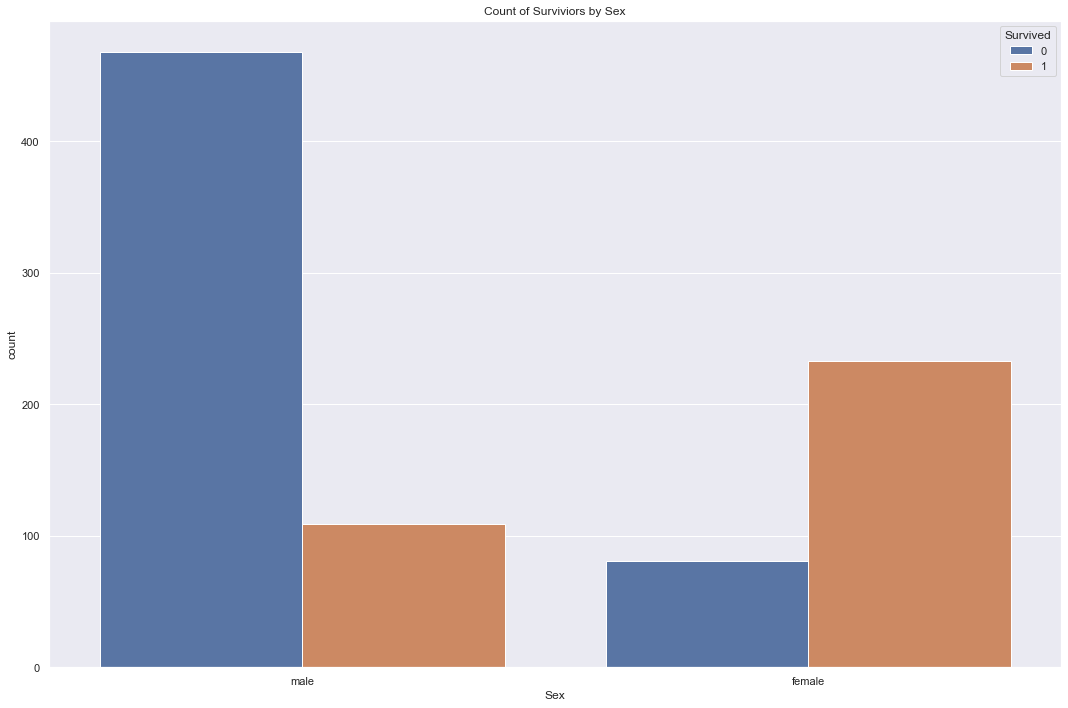

In [10]:
#Write code here
"""plot survival by sex with seaborn"""
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title("Count of Surviviors by Sex")
plt.tight_layout()

# Q4(.5) What is your observation from this plot.

Examining the count of survivors by sex shows the survival rate for women was much higher than that of men.





We can't use name as a feature for building any machine learning classifier(logistic regression). Let's look at Name columns and see if we can think of a better features for name.

In [11]:
titanic_df['Name'].sample(30)

548                            Goldsmith, Mr. Frank John
509                                       Lang, Mr. Fang
12                        Saundercock, Mr. William Henry
600    Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...
221                                 Bracken, Mr. James H
474                          Strandberg, Miss. Ida Sofia
472              West, Mrs. Edwy Arthur (Ada Mary Worth)
258                                     Ward, Miss. Anna
506        Quick, Mrs. Frederick Charles (Jane Richards)
73                           Chronopoulos, Mr. Apostolos
594                              Chapman, Mr. John Henry
321                                     Danoff, Mr. Yoto
765                 Hogeboom, Mrs. John C (Anna Andrews)
769                     Gronnestad, Mr. Daniel Danielsen
276                    Lindblom, Miss. Augusta Charlotta
873                          Vander Cruyssen, Mr. Victor
244                                 Attalah, Mr. Sleiman
562                           N

# Q5.(.5 points) Can you suggest a feature based on *Name* columns 

Assuming standard convention of titles given to women in the english language during the time period a new featue "married" could be derived from the name column. Mrs. == married, Ms. == not_married.





# Q6(.5 points) Create a new feature named *Title* from the *Name* columns.

Hint: Here are different title

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess',
       'Jonkheer.'], dtype=object)
       
       
You can look in wikipedia see what different title meant that time.

In [12]:
# Write code here
"""create new feature "title" using df.apply and regular expression"""
titles = ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
          'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 
          'Countess', 'Jonkheer.']

# regex serach function
def search_title(name, titles):
    
    re_pattern = '|'.join(titles)
    search_object = re.search(re_pattern, name)
    if search_object:
        return name[search_object.start(): search_object.end()]
    else:
        return "NO_TITLE"
# apply search
titanic_df['Title'] = titanic_df['Name'].apply(lambda x : search_title(x, titles))

# Q 7 (. 5 points) Using seaborn, plot survival based on Title. Display separate plot for male and female.

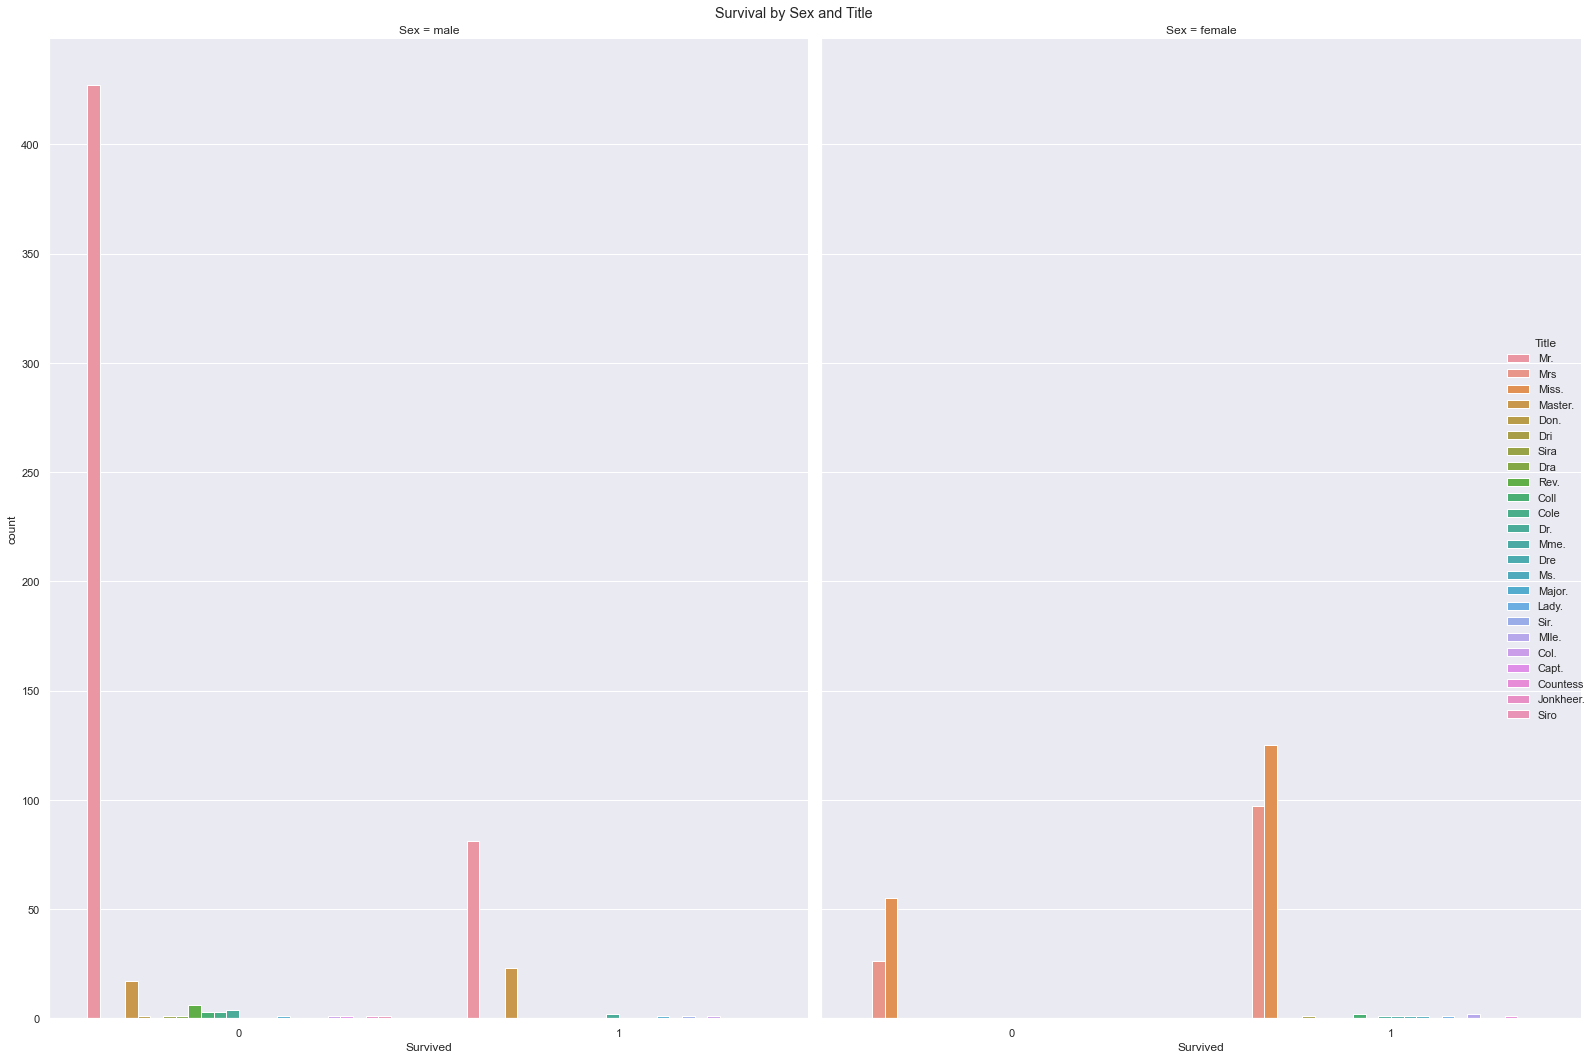

In [13]:
# Write code here
""" faceted plot Survival by Sex and Title, Seaborn"""
title_plot = sns.catplot(col='Sex', x='Survived', hue='Title', kind='count', 
            data=titanic_df, height=15, aspect=0.7)
title_plot.fig.suptitle('Survival by Sex and Title')
plt.tight_layout()
plt.show()

# Q 8(.5 points) What is your observation from these plots

Examining the above plots it's clear that many more women survived than men. The plot also shows that majority of records in the data detail passengers with the titles Mr., Mrs., Miss, or Master.


Let's fix Age nan issue. It has 167 nan values.

# Q9 (.5 points) Fill the Age nan value by the mean for each **Title** group.

In [14]:
"""looks like 177 nan values"""
titanic_df['Age'].isnull().sum()

177

In [15]:
# Write code here
"""group titanic_df by title, apply lambda function to fillna in Age with mean of Age in grouped data"""
titanic_df['Age'] = titanic_df.groupby(['Title'], 
                    sort=False)['Age'].apply(lambda x : x.fillna(np.round(np.mean(x), decimals=0)))                  

In [16]:
# Let's see if there are still some NAN 
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            2
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Cabin_type     0
Title          0
dtype: int64

There are two record with missing Embarked value.

In [17]:
# Let's drop these two record
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [18]:
titanic_df.Sex = np.where(titanic_df['Sex'] =='male', 1, 0)

In [19]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Cabin_type      object
Title           object
dtype: object

In [20]:
titanic_clean_df= titanic_df[[
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_type',
 'Title']]

# Q10.(.5 points) Using titanic_clean_df  convert  *Title* and *Cabin_type* into dummy columns.

In [21]:
# Write code here
"""call pd.get_dummies(), specify columns to convert"""
titanic_clean_df = pd.get_dummies(titanic_clean_df, columns=['Title', 'Cabin_type'])
titanic_clean_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Capt.,Title_Col.,...,Title_Siro,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_O,Cabin_type_T
0,0,3,1,22.0,1,0,7.2500,S,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,C,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,35.0,1,0,53.1000,S,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,S,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,3,1,32.0,0,0,8.4583,Q,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,1,1,54.0,0,0,51.8625,S,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,3,1,2.0,3,1,21.0750,S,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1,3,0,27.0,0,2,11.1333,S,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1,2,0,14.0,1,0,30.0708,C,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
titanic_clean_df.dtypes

# Q11.(.5) Plot headmap of correlation using titanic_df

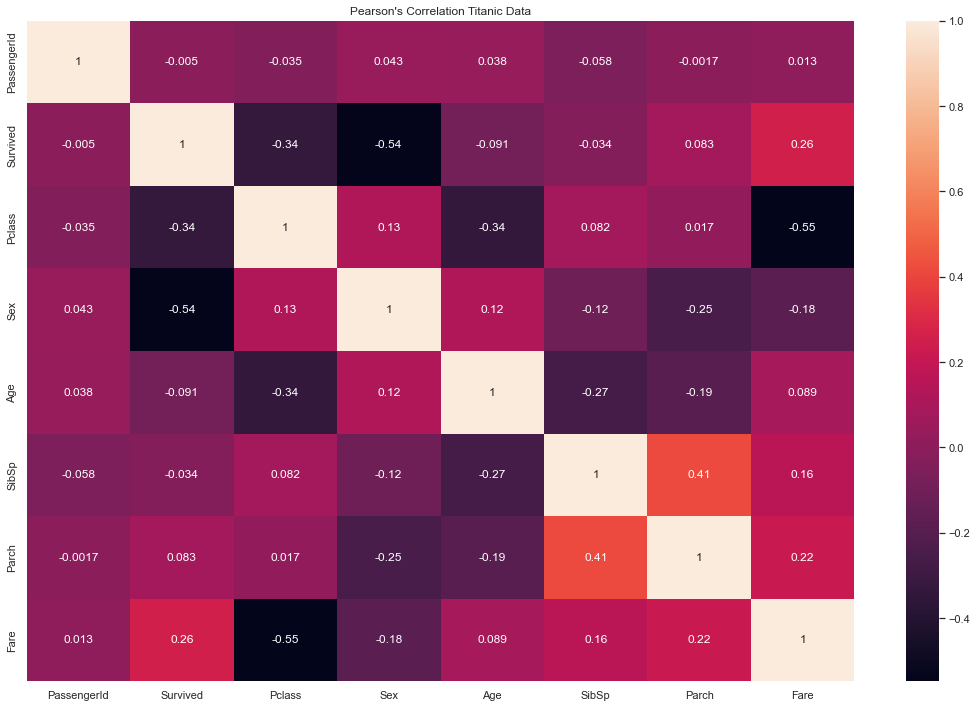

In [22]:
# Write code here
"""plot Pearson's correlation using seaborn. NOTE: I'm assuming original titanic_df should be used not titanic_clean_df """
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(titanic_df.corr(), annot=True)
plt.title('Pearson\'s Correlation Titanic Data')
plt.tight_layout()

# Q 12.(.5) What are your observation from this heatmap.

It does not appear that there is a strong positive or negative linear relationship between any of the above variables detailed in the heatmap. The heatmap is also taking categorical variables into account. My normal approach would be to separate continuous and discrete data prior to plotting a heatmap. This was not specified in the instructions so I did not in this case.

 

Note that correlation  measures **linear relationships** and is defined for numeric attributes. Also, be careful that
there need not the a linear relationship between variables(Survived vs any other attributes).

For categorical variable, we need to use a different measure of association.

- [Cramér's V, measure of association between two nominal variables](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

It is based on a nominal variation of Pearson’s Chi-Square Test.

Let's use this implementation from stack overflow
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792. It shows usage for **tips** dataset from seaborn.

Let's copy paste this here

In [23]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

Let's work with  titanic dataset again


# Q 13(.5 points) Copy titanic_df into titanic_df_small  Dataframe.  Only select record with Title value = *Master., Miss., Mr. or Mrs.*     into titanic_df_small.

You can check other title doesn't have enough record, hence ignoring them from our analysis.

In [24]:
# Write code here
"""check other titles"""
titanic_df['Title'].value_counts()


Mr.          508
Miss.        179
Mrs          122
Master.       40
Dr.            7
Rev.           6
Coll           5
Cole           3
Col.           2
Mlle.          2
Major.         2
Lady.          1
Jonkheer.      1
Countess       1
Capt.          1
Sir.           1
Mme.           1
Ms.            1
Dre            1
Dra            1
Sira           1
Dri            1
Don.           1
Siro           1
Name: Title, dtype: int64

In [25]:
"Create reduced dataframe"
titles = ['Master.', 'Miss.', 'Mr.', 'Mrs']
boolean_filter = titanic_df['Title'].isin(titles)
titanic_df_small = titanic_df[boolean_filter]
titanic_df_small.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,O,S,O,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,O,S,O,Mr.
5,6,0,3,"Moran, Mr. James",1,32.0,0,0,330877,8.4583,O,Q,O,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,E,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,O,S,O,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,O,S,O,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,O,C,O,Mrs


# Q 14 (.5 points) Using pandas cross tabulate *Survived* and *Title* in titanic_df_small. Also compute cramers_v for association between *Survived* and *Title*.

In [26]:
# Write code here
"""cross tabulation of Survived and Title"""
table = pd.crosstab(titanic_df_small['Survived'], titanic_df_small['Title'])
table

Title,Master.,Miss.,Mr.,Mrs
Survived,,,,
0,17,55,427,26
1,23,124,81,96


In [27]:
"""Cramer's association between Survived and Title"""
cramers_v(table.values)

0.5620869369538218

# Q 15(.5 points) Using sklearn library, Label encode *Title* in titanic_df_small into a new column called *Encoded_title*

In [28]:
# Write code here
"""encode Title using sklearn LabelEncoder()"""
le = LabelEncoder()
titanic_df_small['Encoded_title'] = le.fit_transform(titanic_df_small['Title'])

/var/folders/s4/yckpqxmx6cnf837zqjqn_hxc0000gn/T/ipykernel_2343/1617107532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_small['Encoded_title'] = le.fit_transform(titanic_df_small['Title'])


# Q 16(.5 points) Calculate correlation coefficients between *Survived* and *Encoded_title*.

In [29]:
# Write code here
"""calculate correlation between Survived and Encoded_title"""
titanic_df_small['Survived'].corr(titanic_df_small['Encoded_title'])

-0.0732366672936724

# Q 17. (.5 points) Whats is your observation between using cramer_v and correlation coefficients for  *Survived* and *Encoded_title/Title*.

Using the two different methods for computing correlation produces wildly different results. Cramer's V is a more reliable and valid test statistic. Computing correlation between "Survived" and "Encoded_title" is not meaningful. Encoded_title is an integer representation of the category levels in "Title." It makes no sense to compute a numeric correlation coefficient in this case.